# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
from scipy.stats import shapiro
import scipy.stats as stats

# **1. Download dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cartype.xls to cartype.xls


In [ ]:
# Get the file path of the uploaded xls file
file_path = uploaded.get('cartype.xls')

In [ ]:
cartype_df = pd.read_excel(file_path)

# **2. Understand the dataset**

In [ ]:
cartype_df.dtypes

Model Year                           int64
Mfr Name                            object
Division                            object
Carline                             object
Engine Displacement                float64
# Cylinders                          int64
Transmission                        object
City FE                              int64
Highway FE                           int64
Combined FE                          int64
Air Aspiration Method               object
Transmission Description            object
# Gears                              int64
Drive Desc                          object
Carline Class Desc                  object
Release Date                datetime64[ns]
City CO2                             int64
Highway CO2                          int64
Combined CO2                         int64
dtype: object

In [ ]:
cartype_df

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-01-20,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2015,Mercedes-Benz,Mercedes-Benz,GL 550 4MATIC,4.7,8,Auto,13,18,15,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-15,660,498,587
725,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,3.5,6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-15,506,396,456
726,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,3.5,6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-23,506,396,456
727,2015,Mercedes-Benz,Mercedes-Benz,ML 400 4MATIC,3.0,6,Auto,18,22,20,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-04,496,403,454


# **3. Data Preprocessing**

3.1 Identifying missing value

In [ ]:
# Identifying missing values

missing_values = cartype_df.isnull().sum()
print(missing_values)

Model Year                  0
Mfr Name                    0
Division                    0
Carline                     0
Engine Displacement         0
# Cylinders                 0
Transmission                0
City FE                     0
Highway FE                  0
Combined FE                 0
Air Aspiration Method       0
Transmission Description    0
# Gears                     0
Drive Desc                  0
Carline Class Desc          0
Release Date                0
City CO2                    0
Highway CO2                 0
Combined CO2                0
dtype: int64


No missing values identifed

3.2 Identifying duplicates entry

In [ ]:
# identify duplicate entries in Cartype
duplicates = cartype_df[cartype_df.duplicated()]

# print the list of the duplicates identified
print(duplicates)

     Model Year            Mfr Name   Division                      Carline  \
537        2015      General Motors  Chevrolet  G2500 EXPRESS 2WD PASS MDPV   
545        2015      General Motors        GMC   G2500 SAVANA 2WD PASS MDPV   
556        2015  Chrysler Group LLC        RAM                C/V Tradesman   
562        2015      General Motors  Chevrolet                  EQUINOX FWD   
567        2015      General Motors        GMC                  TERRAIN FWD   
574        2015  Chrysler Group LLC       Jeep                 Cherokee FWD   
626        2015  Chrysler Group LLC       Jeep                 Cherokee 4X4   

     Engine Displacement  # Cylinders Transmission  City FE  Highway FE  \
537                  6.0            8         Auto       11          16   
545                  6.0            8         Auto       11          16   
556                  3.6            6         Auto       18          26   
562                  2.4            4         Auto       22        

List of 7 duplicates identified

3.2.1 Removing duplicates

In [ ]:
# Remove all the duplicates from the dataframe
cartype_df = cartype_df.drop_duplicates()

In [ ]:
# Save into new files without the duplicates in csv format
cartype_df.to_csv('cartype.1_without_duplicates.csv', index=False)

In [ ]:
# View dataframe after duplicates lines removed
cartype_df

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-01-20,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2015,Mercedes-Benz,Mercedes-Benz,GL 550 4MATIC,4.7,8,Auto,13,18,15,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-15,660,498,587
725,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,3.5,6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-15,506,396,456
726,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,3.5,6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-23,506,396,456
727,2015,Mercedes-Benz,Mercedes-Benz,ML 400 4MATIC,3.0,6,Auto,18,22,20,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-04,496,403,454


Revised data dataframe with 721 records, including headers = 722 rows

3.3 Test on Normality

3.3.1 Fuel Economy

      Variable  Skewness  Kurtosis                        Distribution
0      City FE   0.68926   1.12583            Not Normally Distributed
1   Highway FE   0.25336  -0.23374  Approximately Normally Distributed
2  Combined FE   0.41603   0.15938  Approximately Normally Distributed


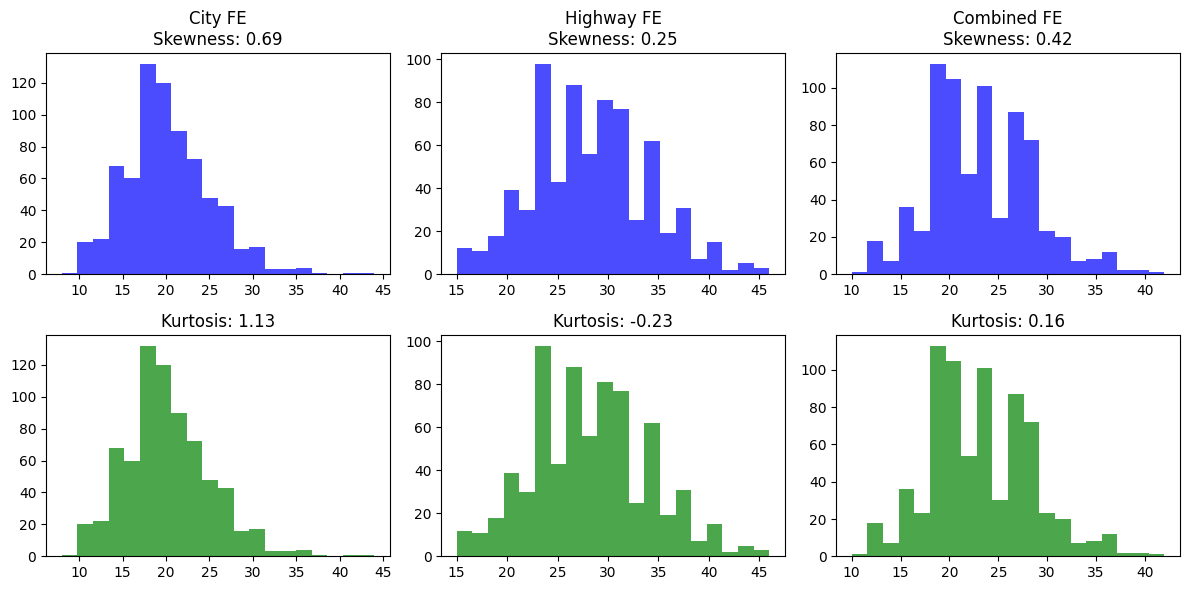

In [ ]:
# Analysing and visual inspecting the shape of the graph for each variable
# For research question #1 on fuel economy

variables_to_analyze = ["City FE", "Highway FE", "Combined FE"]

# Subplots is created for each variable
fig, axes = plt.subplots(nrows=2, ncols=len(variables_to_analyze), figsize=(12, 6))

# DataFrame to store the results
results_df = pd.DataFrame(columns=["Variable", "Skewness", "Kurtosis", "Distribution"])

for i, var in enumerate(variables_to_analyze):
    # Calculate skewness and kurtosis
    skewness = skew(cartype_df[var])
    kurt = kurtosis(cartype_df[var])

    # First histogram to visualise skewness of each variable
    axes[0, i].hist(cartype_df[var], bins=20, color='blue', alpha=0.7)
    axes[0, i].set_title(f"{var}\nSkewness: {skewness:.2f}")

    # Second histogram to visualise kurtosis
    axes[1, i].hist(cartype_df[var], bins=20, color='green', alpha=0.7)
    axes[1, i].set_title(f"Kurtosis: {kurt:.2f}")

    # Conditional set for distribution type based on skewness and kurtosis with indications of the results
    if -0.5 <= skewness <= 0.5 and -2 <= kurt <= 2:
        distribution = "Approximately Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    result = pd.DataFrame({"Variable": [var], "Skewness": [skewness], "Kurtosis": [kurt], "Distribution": [distribution]})

    # Concatenate the result to the results_df
    results_df = pd.concat([results_df, result], ignore_index=True)

# Adjust plot layout
plt.tight_layout()

# Display the result in table
print(results_df)

# Show the plots
plt.show()


Analysis:
*   All variables are positively skewed and heavier tail on the right.
*   Result of the skewness and kurtosis showing City FE is not normally distributed, whereby both Highway FE and Combined FE are approximately normal.
* This should be further proven by Shapiro-Wilk Normality Test to confirm normality.



In [ ]:
# Shapiro-Wilk Normality test
variables_to_analyze = ["City FE", "Highway FE", "Combined FE"]

# DataFrame to store the results
results_list = []

for var in variables_to_analyze:
    stat, p = shapiro(cartype_df[var])
    if p > 0.05:
        message = "Normally distributed"
    else:
        message = "Not normally distributed"
    result = pd.DataFrame({"Variable": [var], "stat": [stat], "p value": [p], "Message": [message]})
    results_list.append(result)

# Concatenate the results into a DataFrame
results_df = pd.concat(results_list, ignore_index=True)

# Display the result in a table
print(results_df)


      Variable    stat  p value                   Message
0      City FE 0.97039  0.00000  Not normally distributed
1   Highway FE 0.99052  0.00013  Not normally distributed
2  Combined FE 0.98420  0.00000  Not normally distributed


To conclude, City, Highway, Combined FE are not normally distributed as the p value <0.05 resulted from Shapiro-Wilk Normality test.


3.3.2 CO2 (Carbon emissions)

       Variable  Skewness  Kurtosis              Distribution
0      City CO2   0.98732   1.62420  Not Normally Distributed
1   Highway CO2   0.97398   1.28014  Not Normally Distributed
2  Combined CO2   0.99273   1.51123  Not Normally Distributed


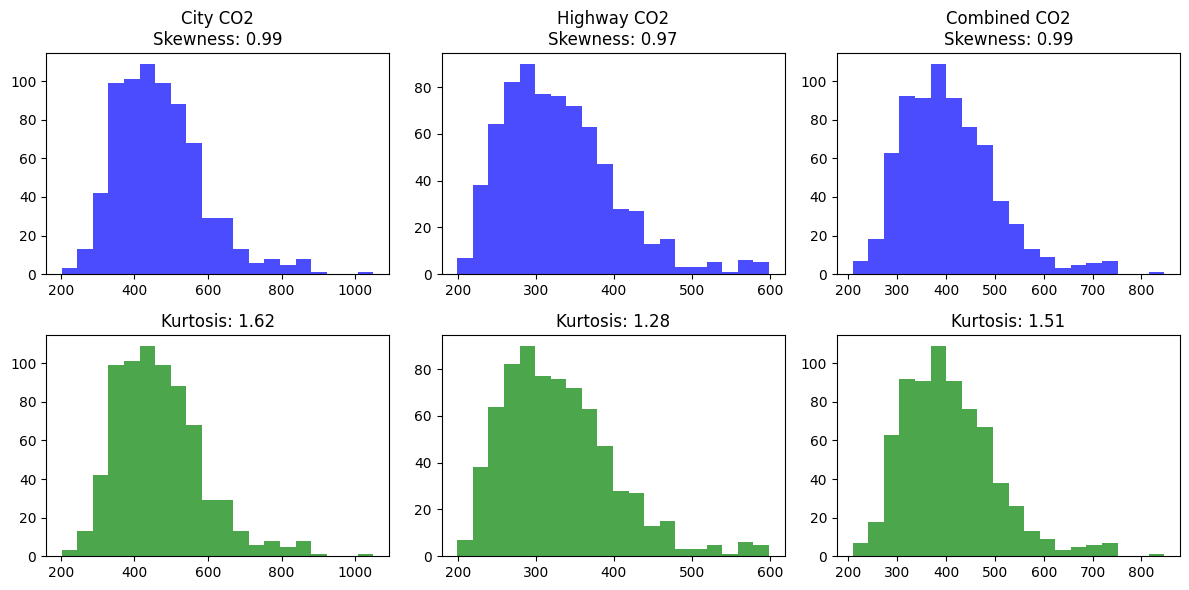

In [ ]:
# Analysing and visual inspecting the shape of the graph for each variable
# For research question #2 on carbon emissions - environmental friendly model

variables_to_analyze = ["City CO2", "Highway CO2", "Combined CO2"]

# Subplots is created for each variable
fig, axes = plt.subplots(nrows=2, ncols=len(variables_to_analyze), figsize=(12, 6))

# DataFrame to store the results
results_df = pd.DataFrame(columns=["Variable", "Skewness", "Kurtosis", "Distribution"])

for i, var in enumerate(variables_to_analyze):
    # Calculate skewness and kurtosis
    skewness = skew(cartype_df[var])
    kurt = kurtosis(cartype_df[var])

    # First histogram to visualise skewness of each variable
    axes[0, i].hist(cartype_df[var], bins=20, color='blue', alpha=0.7)
    axes[0, i].set_title(f"{var}\nSkewness: {skewness:.2f}")

    # Second histogram to visualise kurtosis
    axes[1, i].hist(cartype_df[var], bins=20, color='green', alpha=0.7)
    axes[1, i].set_title(f"Kurtosis: {kurt:.2f}")

    # Conditional set for distribution type based on skewness and kurtosis with indications of the results
    if -0.5 <= skewness <= 0.5 and -2 <= kurt <= 2:
        distribution = "Approximately Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    result = pd.DataFrame({"Variable": [var], "Skewness": [skewness], "Kurtosis": [kurt], "Distribution": [distribution]})

    # Concatenate the result to the results_df
    results_df = pd.concat([results_df, result], ignore_index=True)

# Adjust plot layout
plt.tight_layout()

# Display the result in table
print(results_df)

# Show the plots
plt.show()


Analysis:
*   All variables are positively skewed and heavier tail on the right.
*   Result of the skewness and kurtosis all CO2 variables are not normally distributed.
* This should be further proven by Shapiro-Wilk Normality Test to confirm normality as below.


In [ ]:
# Shapiro-Wilk Normality test
# Create a DataFrame to store the results
normality_results = pd.DataFrame(columns=["Variable", "Shapiro Statistic", "p-value", "Normality"])

# List of variables to test for normality
variables_to_test = ["City FE", "Highway FE", "Combined FE"]

results_list = []

# Loop through each variable and perform the Shapiro-Wilk test
for var in variables_to_test:
    stat, p = shapiro(cartype_df[var])

    if p > 0.05:
        normality = "Normally Distributed"
    else:
        normality = "Not Normally Distributed"

    results_list.append(pd.DataFrame({"Variable": [var], "Shapiro Statistic": [stat], "p-value": [p], "Normality": [normality]}))

# Concatenate the individual results DataFrames into one
normality_results = pd.concat(results_list, ignore_index=True)

# Display the results in a table
print(normality_results)


      Variable  Shapiro Statistic  p-value                 Normality
0      City FE            0.97039  0.00000  Not Normally Distributed
1   Highway FE            0.99052  0.00013  Not Normally Distributed
2  Combined FE            0.98420  0.00000  Not Normally Distributed


To conclude, City, Highway, Combined FE are not normally distributed as the p value <0.05 resulted from Shapiro-Wilk Normality test.

3.4 Identifying outliers using boxplot

3.4.1 Fuel Economy

<Axes: ylabel='City FE'>

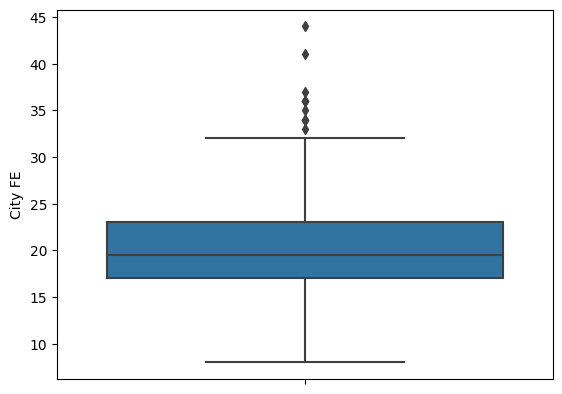

In [ ]:
# City FE
sns.boxplot(y=cartype_df['City FE'])

<Axes: ylabel='Highway FE'>

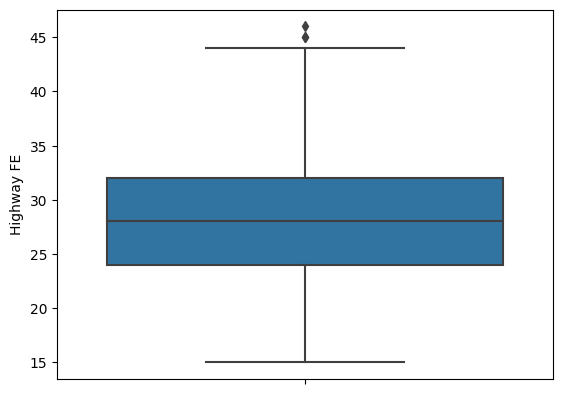

In [ ]:
# Highway FE
sns.boxplot(y=cartype_df['Highway FE'])

<Axes: ylabel='Combined FE'>

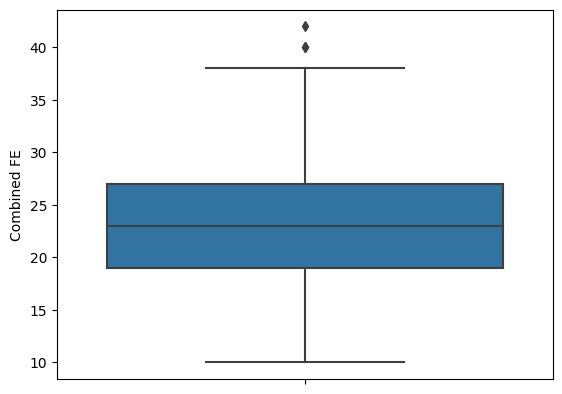

In [ ]:
# Combined FE
sns.boxplot(y=cartype_df['Combined FE'])

Analysis- FE
*   City FE: Outliers lie above 33 miles per gallon (mpg)
*   Highway and Combined FE: Outliers are >40mpg  



3.4.2 CO2 (Carbon emissions)

<Axes: ylabel='City CO2'>

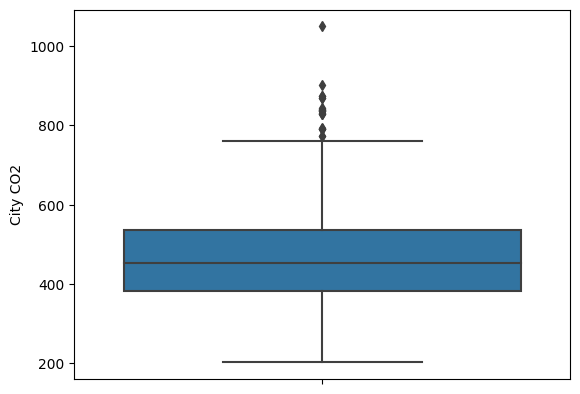

In [ ]:
# City CO2
sns.boxplot(y=cartype_df['City CO2'])

<Axes: ylabel='City CO2'>

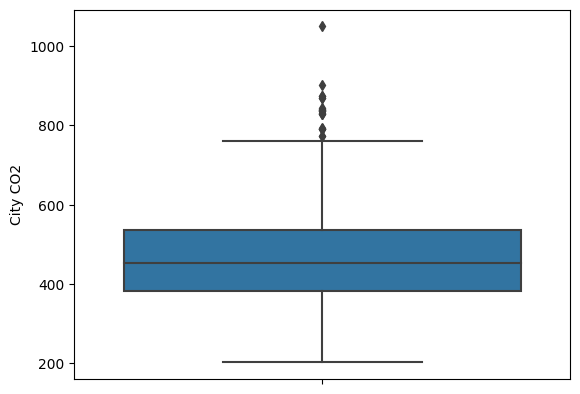

In [ ]:
#  Highway CO2
sns.boxplot(y=cartype_df['Highway CO2'])

<Axes: ylabel='Combined CO2'>

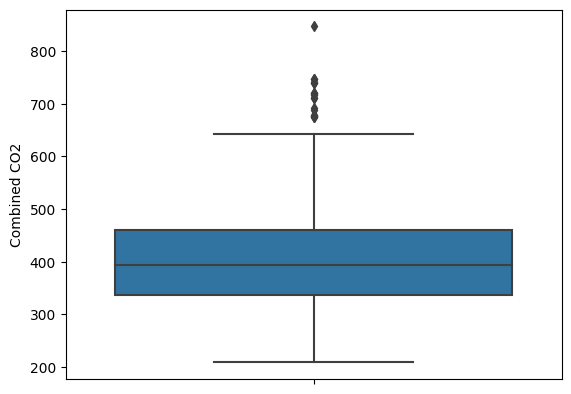

In [ ]:
#  Combined CO2
sns.boxplot(y=cartype_df['Combined CO2'])

Analysis- CO2

*   City CO2 and Highway CO2 showed data points that are approx. >780 gallons per mile (gpm) are outliers
*   Outliers for Combined CO2 are data points above approx. 670gpm.



All outliers are retained, no separate treatments are performed to the entirety of the dataset, and justifications are as below:

*  Research questions are studying the best FE and the highest CO2 emissions of different car models, with different specifications. Extreme observations are expected, not true outliers. Removals may lose sights for the result.
* The dataset was made up of ununiformed specifications of different car models and carlines, it is fairer if outliers analysis performed by carline category.  
* Separate treatments on outliers in this context is not necessary, as it does not bring differences or add deeper meaning to the results.







# **4. Descriptive Statistics**




In [ ]:
cartype_df.describe()

,Model Year,Engine Displacement,# Cylinders,City FE,Highway FE,Combined FE,# Gears,City CO2,Highway CO2,Combined CO2
count,722.0,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,2015.0,3.150139,5.632964,20.094183,28.254848,23.040166,6.472299,470.173130,329.343490,406.753463
std,0.0,1.352454,1.806805,4.930529,5.786194,5.227400,1.168202,119.249696,71.191083,96.484792
min,2015.0,1.000000,3.000000,8.000000,15.000000,10.000000,1.000000,202.000000,199.000000,209.000000
25%,2015.0,2.000000,4.000000,17.000000,24.000000,19.000000,6.000000,382.000000,277.000000,337.000000
50%,2015.0,3.000000,6.000000,19.500000,28.000000,23.000000,6.000000,453.500000,319.000000,393.000000
75%,2015.0,3.700000,6.000000,23.000000,32.000000,27.000000,7.000000,536.000000,369.750000,461.000000
max,2015.0,8.000000,16.000000,44.000000,46.000000,42.000000,9.000000,1050.000000,599.000000,847.000000


Measure of Central Tendency

In [ ]:
# Calculate the mean, median, mode for FE
columns_to_analyze = ["City FE", "Highway FE", "Combined FE"]

# Calculate the mean, median, and mode for each variable
central_tendencies = pd.DataFrame({
    'Variable': columns_to_analyze,
    'Mean': cartype_df[columns_to_analyze].mean(),
    'Median': cartype_df[columns_to_analyze].median(),
    'Mode': cartype_df[columns_to_analyze].mode().iloc[0],  # Calculate mode
})

# Round the values to 2 decimal places
central_tendencies = central_tendencies.round(2)

# Display the central tendencies table
print(central_tendencies)


                Variable   Mean  Median  Mode
City FE          City FE  20.09    19.5  17.0
Highway FE    Highway FE  28.25    28.0  24.0
Combined FE  Combined FE  23.04    23.0  18.0


In [ ]:
# Calculate the mean, median, mode for CO2
columns_to_analyze = ["City CO2", "Highway CO2", "Combined CO2"]

central_tendencies = pd.DataFrame({
    'Variable': columns_to_analyze,
    'Mean': cartype_df[columns_to_analyze].mean(),
    'Median': cartype_df[columns_to_analyze].median(),
    'Mode': cartype_df[columns_to_analyze].mode().iloc[0],  # Calculate mode
})

# Round the values to 2 decimal places
central_tendencies = central_tendencies.round(2)

# Display the central tendencies table
print(central_tendencies)


                  Variable    Mean  Median   Mode
City CO2          City CO2  470.17   453.5  352.0
Highway CO2    Highway CO2  329.34   319.0  264.0
Combined CO2  Combined CO2  406.75   393.0  340.0


# **5. Inferential Statistics**

##**5.1 Spearman's correlation between Combined FE vs CO2**
* To examine overall strengths and relationship between combined FE and CO2, help to establish the overall expectations about the dataset.

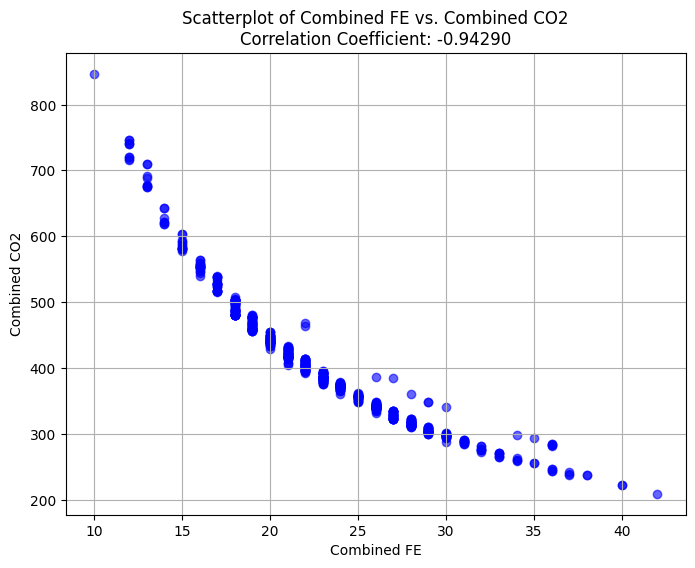

Pearson Correlation Coefficient: -0.94290
P-value: 0.00000


In [ ]:
# Extract the data for Combined FE and Combined CO2
combined_FE = cartype_df['Combined FE']
combined_CO2 = cartype_df['Combined CO2']

# Perform the Pearson correlation analysis
correlation_coefficient, p_value = stats.pearsonr(combined_FE, combined_CO2)

# Create a scatterplot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(combined_FE, combined_CO2, color='blue', alpha=0.6)
plt.xlabel("Combined FE")
plt.ylabel("Combined CO2")
plt.title("Scatterplot of Combined FE vs. Combined CO2\nCorrelation Coefficient: {:.5f}".format(correlation_coefficient))
plt.grid(True)
plt.show()

# Print the correlation coefficient and p-value
print("Pearson Correlation Coefficient: {:.5f}".format(correlation_coefficient))
print("P-value: {:.5f}".format(p_value))


Spearman’s correlation shows a strong negative correlation at -0.9429 between Combined FE and Combined CO2. This result suggests that higher miles per gallon should produce less CO2 (gallons per mile), which is in line to the purpose of the study, and technology in sustainability effort. In contrast, higher CO2 also means respective car model is lower in FE.

# **5.2.1 Hypothesis #1**

**H₀:	Fuel economy of a car model is not impacted by the car cylinders specifications variations.**

**H₁: 	Car cylinders specifications variation significantly determine the fuel economy of a car model.**

This hypothesis tries to examine whether cylinders specifications affect the combined FE in a car model. Conclusion will be drawn based on pre-determined p-value at 0.05.

Non-parametric test Kruskal-Wallis test is used as data are not normally distributed and no normality is assumed.

In [ ]:
# Testing variable groups
group_1 = (cartype_df['Combined FE'])
group_2 = (cartype_df['# Cylinders'])

# Perform the Kruskal-Wallis test
statistic, p_value = stats.kruskal(group_1, group_2)

print("Kruskal-Wallis Test Statistic:", statistic)
print("P-value:", p_value)

# Check if the result is statistically significant @ significance level 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between groups.")

Kruskal-Wallis Test Statistic: 1099.4177765811494
P-value: 4.420055456661784e-241
Reject the null hypothesis - There is a significant difference between groups.


**Conclusion:**

Number of cylinders impact on the FE, the less the number of cylinders, it is  positively affecting the FE with higher rating combined FE in a car model. Car models with 16 cylinders are conversely has lower combined FE rating (opposite direction). The result suggests rejecting Null hypothesis (H₀) as p value <0.05.

# **5.2.2 Hypothesis #2**

**H₀: 	The level of greenhouse gas (CO2) releases remains similar regardless of the engine displacements in a car.**

**H₁:  	Engine displacements have an impact to greenhouse gas (CO2) emissions.**


This hypothesis tries to examine whether engine displacements affect the CO2 emissions in a car model. Conclusion will be drawn based on pre-determined p-value at 0.05.

Non-parametric test: Spearman's rank-order correlation is used as data are not normally distributed and no normality is assumed.

In [ ]:
# Testing variables
engine_displacements = (cartype_df['Engine Displacement'])
combined_co2 = (cartype_df['Combined CO2'])

# Perform Spearman's correlation
correlation, p_value = stats.spearmanr(engine_displacements, combined_co2)

print("Spearman's Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Check if the result is statistically significant @ significance level 0.05
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between engine displacements and Combined CO2 emissions.")
else:
    print("There is no significant correlation between engine displacements and Combined CO2 emissions.")

Spearman's Correlation Coefficient: 0.8881341831981076
P-value: 2.675312720636327e-245
There is a significant correlation between engine displacements and Combined CO2 emissions.


As a result, cars with less engine displacements produce lower CO2 and the more engine displacements the higher the CO2 emissions. The result from Spearman's rank order test suggests rejecting Null hypothesis (H₀).

# **6.0 Conclusion**
As a conclusion, the dataset studies focus on FE and CO2 rating in automotive sector. Cartype dataset aims to be the guidance for consumers when they decide to purchase a car (EPA&DOE, 2023). Automotive sector is a technology led sector, and technology brings advancement in constructions and building of the engine displacement, cylinders, air aspiration method in a carline, with cost efficiency and sustainability in mind. Continuous investments in research and development by car manufacturers in cylinders, transmissions technology supports the improvement in FE, which reduces the CO2 emissions.

